# Zones and Filtering

Introduction to filtering of image data, with a focus on applying different filtes to different parts of the image.

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from skimage.color import rgb2gray
from skimage import img_as_ubyte
from scipy.ndimage import convolve

## Get the data, and convert them to gray & uint8

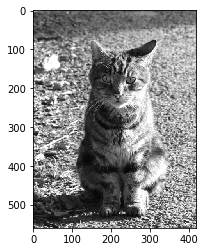

In [7]:
inDir = r'D:\Users\thomas\Office\CSS_Lenny\Coding\Python\CSS_ipynb\data\images'
inFile = 'cat.jpg'
data = plt.imread(os.path.join(inDir,inFile))

# In order to work with a gray-level image, take only one of the three layers
gray_cat = data[:,:,0]

# If required, you can convert uint8 data to floats, between 0 and 1:
#data_g = rgb2gray(data)
#data_u = img_as_ubyte(data_g)

plt.imshow(gray_cat)
plt.show()

# Note that the default colormap is NOT gray-level!

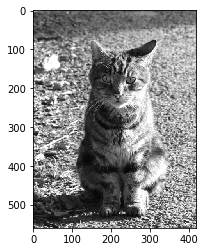

(560, 420)

In [8]:
# If we want to see the image in gray:
plt.set_cmap('gray')
plt.imshow(gray_cat)
plt.show()
gray_cat.shape

## Create 3 filters, and filter the data

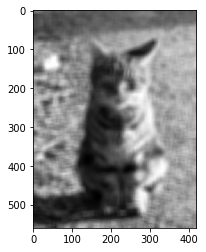

In [9]:
# Create the Filters, with increasing blurring
Filters = list()
Filters.append(np.array([[1.]]))
Filters.append(np.ones((7,7))/49.)
Filters.append(np.ones((15,15))/225.)

# Apply them
filterWithOpenCV = True
Filtered = []

for Filter in Filters:
    if filterWithOpenCV:
        Filtered.append(cv2.filter2D((gray_cat), cv2.CV_32F, Filter))
    else:
        Filtered.append(convolve(gray_cat.astype(float), Filter))

# Show the last filtered output
plt.imshow(Filtered[2])

## Create 3 zones

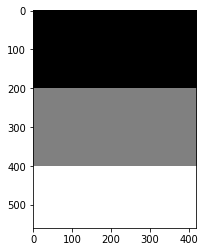

In [10]:
Zones = np.zeros(gray_cat.shape, dtype=np.uint8)
Zones[200:,:]=1
Zones[400:,:]=2
plt.imshow(Zones)

## Apply the corresponding filter to each zone

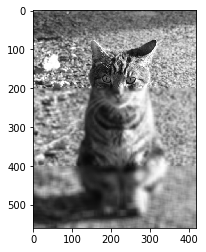

In [11]:
final = np.zeros(gray_cat.shape, dtype = np.uint8)
for ii in np.arange(3):
    final[Zones==ii] = Filtered[ii][Zones==ii]
plt.imshow(final)

[ImgProc_1_Intro](ImgProc_1_Intro.ipynb)<img src="data\images\Forward_Backward.png", align='middle'> [ImgProc_3_GanglionCell](ImgProc_3_GanglionCell.ipynb)


    Author: Thomas Haslwanter
    Date: April 8, 2017
    Ver: 2.1

<img src="data/images/CCA_40.png">
*Images Processing*  is licensed under a Creative Commons Attribution 4.0 International License.